In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [2]:
DataSet = pd.read_excel( 'final_data.xlsx').drop(columns=['name','DOI', 'content (%)' ]).dropna()
# Making one hot encoding of a column
data = pd.get_dummies(data=DataSet, columns=['steel fiber type'])

In [3]:
data.columns

Index(['fiber aspect ratio(mm/mm)', 'fiber density(g/cm3)',
       'volume fraction(%)', 'reinforcement ratio(%)', 'beam width(mm)',
       'beam height(mm)', 'beam length(mm)', 'shear span-depth ratio',
       'fiber tensile strength(MPa)', 'concrete elastic modulus(GPa)',
       'Ductility index(deltau/deltay)', 'Ductility index(deltap/deltay)',
       'Max Load', 'Deltap', 'steel fiber type_Hooked',
       'steel fiber type_None', 'steel fiber type_Smooth',
       'steel fiber type_Twisted'],
      dtype='object')

In [4]:
scaler = MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)

D:\Software\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 2-PairWise Correlation and Correlation to target

D:\Software\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


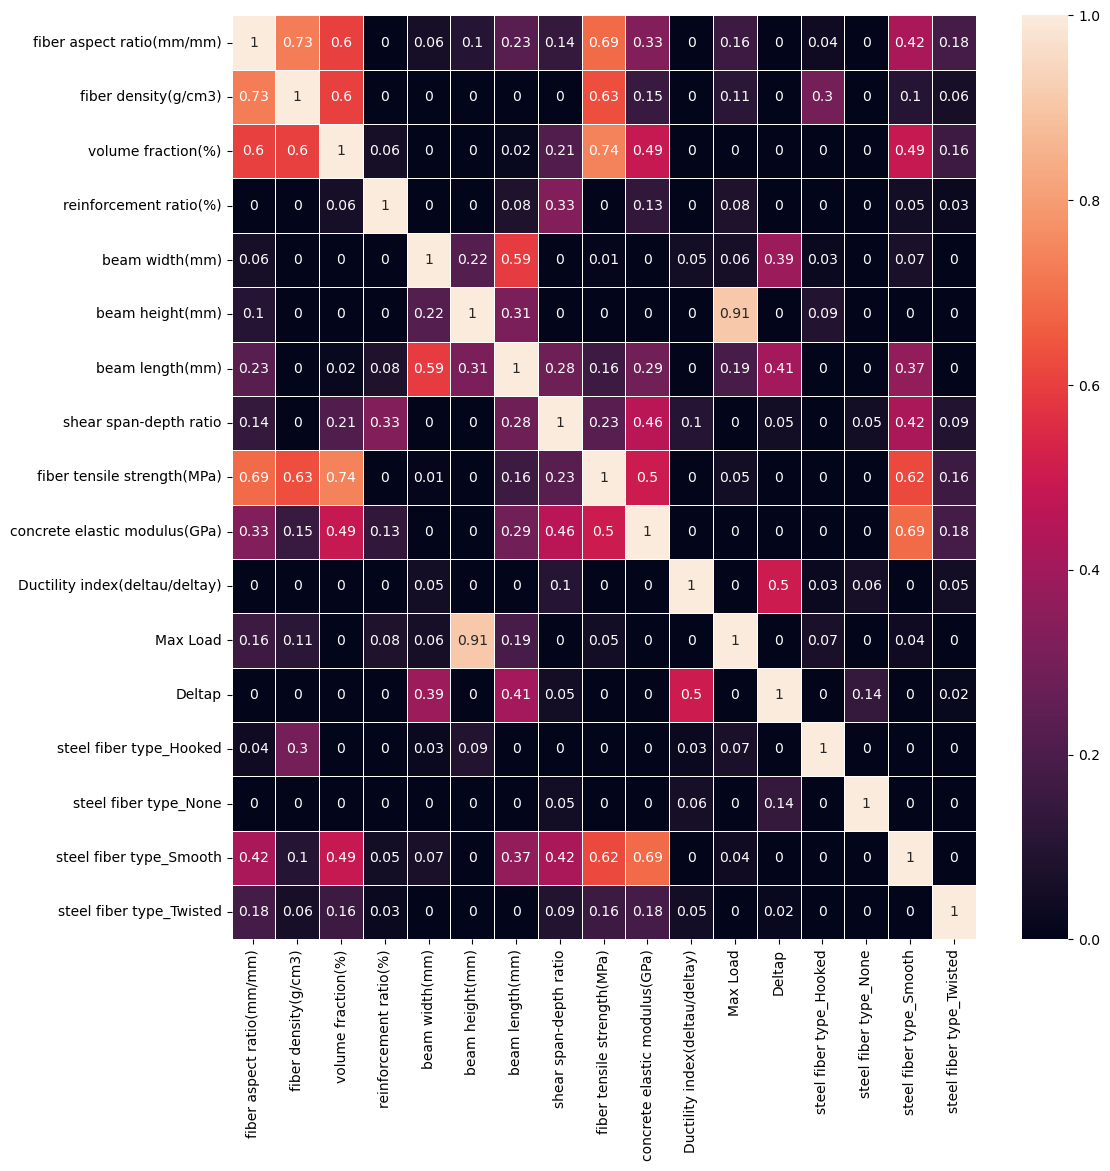

In [5]:

data = data.drop(columns = ['Ductility index(deltap/deltay)'])
scaler = MinMaxScaler()
scaler.fit(data)
normData = pd.DataFrame(scaler.transform(data.values), index=data.index, columns=data.columns)
cor=normData.corr()
for i in range (len(cor)):
    for j in range (len(cor)):
        if cor.iloc[i,j] < 0.01:
            cor.iloc[i,j] = 0
        else:
            cor.iloc[i,j] = round(cor.iloc[i,j] , 2)
fig, ax1 = plt.subplots(figsize=(12,12))
svm=sns.heatmap(cor,annot=True,ax=ax1,  linewidth=.5)


#figure = svm.get_figure()
#plt.tight_layout()
#figure.savefig('PearsonCor.pdf', dpi=400)

In [6]:
#cor.to_excel('pearson_correlation.xlsx')

# Tree-Based Selection(Random Forest)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [8]:

extra = [ 'Ductility index(deltau/deltay)','Max Load']
y1 ='Deltap'
data2 = data.copy().drop(columns = extra)
y=data2[y1]
x=data2.drop(columns=y1)
names=x.columns



In [9]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)


In [10]:
# Create a random forest regresion
clf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(x_train, y_train)
features=[]
# Print the name and gini importance of each feature
for f in zip(names, clf.feature_importances_):
    features.append(f)
features.sort(key=lambda tup: tup[1],reverse=True)

features

[('concrete elastic modulus(GPa)', 0.2878430674635144),
 ('beam width(mm)', 0.18486018839662183),
 ('beam length(mm)', 0.17009706886823414),
 ('reinforcement ratio(%)', 0.12051198230980405),
 ('fiber tensile strength(MPa)', 0.06468235853882327),
 ('volume fraction(%)', 0.05993595785299999),
 ('fiber density(g/cm3)', 0.034124349393484306),
 ('shear span-depth ratio', 0.028527219814796476),
 ('fiber aspect ratio(mm/mm)', 0.027085521384744578),
 ('beam height(mm)', 0.00782794634443945),
 ('steel fiber type_None', 0.006440166893070516),
 ('steel fiber type_Hooked', 0.006014241094805636),
 ('steel fiber type_Smooth', 0.0019895195969675595),
 ('steel fiber type_Twisted', 6.04120476937092e-05)]

In [11]:
#separating feature names and their values 
feature_name=[]
feature_value=[]
for i in features:
    feature_name.append(i[0])
    feature_value.append(i[1])


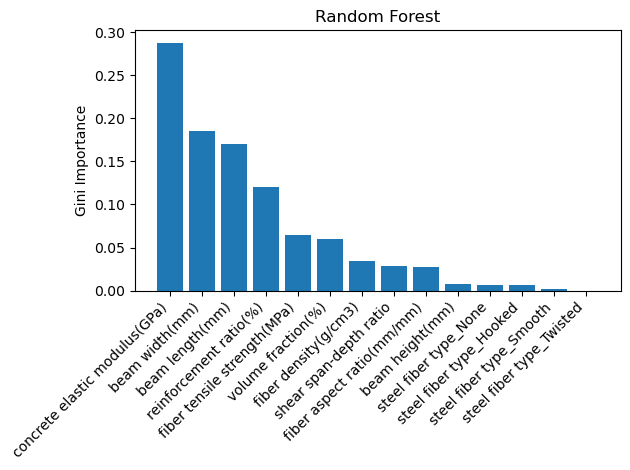

In [12]:
plt.bar(range(len(feature_value)),feature_value)
plt.xticks(range(len(feature_name)),feature_name)
plt.ylabel('Gini Importance')
plt.title('Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('randomforest.pdf',dpi = 400)
plt.show()

# Backward Method

In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [15]:
DataSet = pd.read_excel( 'final_data.xlsx').drop(columns=['name','DOI', 'content (%)' ]).dropna()
# Making one hot encoding of a column
data = pd.get_dummies(data=DataSet, columns=['steel fiber type'])

extra = [ 'Deltap','Ductility index(deltau/deltay)']
y1 ='Max Load'
data2 = data.copy().drop(columns = extra)
y=data2[y1]
x=data2.drop(columns=y1)
names=x.columns
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

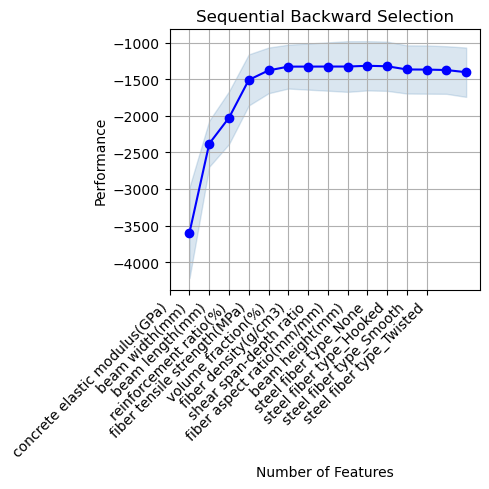

In [16]:


lr = LinearRegression()

sfs = SFS(lr, 
          k_features=1, 
          forward=False, 
          floating=True, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(x_train,y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(5,5))
plt.xticks(range(len(feature_name)),feature_name)
plt.xticks(rotation=45, ha='right')
plt.title('Sequential Backward Selection')
plt.grid()
plt.tight_layout()
#plt.savefig('backward.pdf',dpi = 400)
plt.show()

 
#fig[0].savefig('SBS.png', dpi=800)